In [1]:
import scanpy as sc, anndata as ad, numpy as np, pandas as pd, seaborn as sb

#sc.logging.print_header()

from matplotlib import rcParams

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('default')  


#-- -colors for DCs
col_ids =['tomato','paleturquoise','cornflowerblue','mediumseagreen','mediumpurple',
          'goldenrod','lightgreen','palevioletred','lightsalmon','thistle', #0-9
          "brown","plum","lightskyblue","yellowgreen","mediumorchid","mediumturquoise","peru",
          "#bf812d","mediumaquamarine","lightslategrey","dodgerblue",
          "#4daf4a",'#377eb8','#a6bddb','#35978f','#e08214']


col_groups=['#bcbddc','#addd8e','#756bb1','#78c679']
col_patient_groups=['#deebf7','#9ecae1','#4292c6','#addd8e','#d8daeb','#9e9ac8','#54278f','#66bd63']


In [2]:
sc.settings.set_figure_params(dpi=80)

## Load data 
### 'paCov_Tsang_harm_withSCs_12072021.h5ad' object to be downloaded here: GSE206289
AnnData object containing 79 samples from 40 samples from the pediatric cohort (pCoV) and 39 samples from a publicly available adult COVID-19 cohort (aCoV; Tsang lab; GSE161918). 
The pipeline includes doublet removal, filtring based on mitochondiral as well as batch effect correction using Harmony.  
The number of cells included in the object is 408,281 cells. 


In [16]:
paCov_corrected= sc.read('/projects/ucar-lab/USERS/dnehar/jupyter/paCov/Tsang_data/H5AD/paCov_Tsang_harm_withSCs_12072021.h5ad')
paCov_corrected

AnnData object with n_obs × n_vars = 408281 × 1878
    obs: 'Cells', 'Samples', 'IDs', 'Names', 'Fig_ids', 'Groups', 'Ethnicity', 'Age_Months', 'runs_10X', 'Year', 'Patient_groups', 'SCs', 'n_genes', 'n_counts', 'nCount_RNA', 'nFeature_RNA', 'nCount_CITE', 'nFeature_CITE', 'nCount_HTO', 'nFeature_HTO', 'Batch', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification_global', 'hash_ID', 'INT_ID', 'BARCODE', 'NUM_SNPS', 'NUM_READS', 'DROPLET_TYPE', 'BEST_GUESS', 'BEST_LLK', 'NEXT_GUESS', 'NEXT_LLK', 'DIFF_LLK_BEST_NEXT', 'BEST_POSTERIOR', 'SNG_POSTERIOR', 'SNG_BEST_GUESS', 'SNG_BEST_LLK', 'SNG_NEXT_GUESS', 'SNG_NEXT_LLK', 'SNG_ONLY_POSTERIOR', 'DBL_BEST_GUESS', 'DBL_BEST_LLK', 'DIFF_LLK_SNG_DBL', 'NewBarcode', 'percent_mito', 'autoHashcalls', 'ADTmclust1mean', 'Donor', 'Sample', 'adt_snn_res_0_5', 'seurat_clusters', 'BatchClusters', 'sample', 'BatchSort', 'Age', 'Subject', 'Gender', 'Ward', 'Status', 'Pool', 'Timepoint', 'Class', 'Sorted', 'sample_id', 'sampl

In [4]:
#paCov_corrected.uns['Mono_Res1_colors']=col_ids
paCov_corrected.uns['Groups_colors']= col_groups
paCov_corrected.uns['Patient_groups_colors']= col_patient_groups

## Figure 7B-C

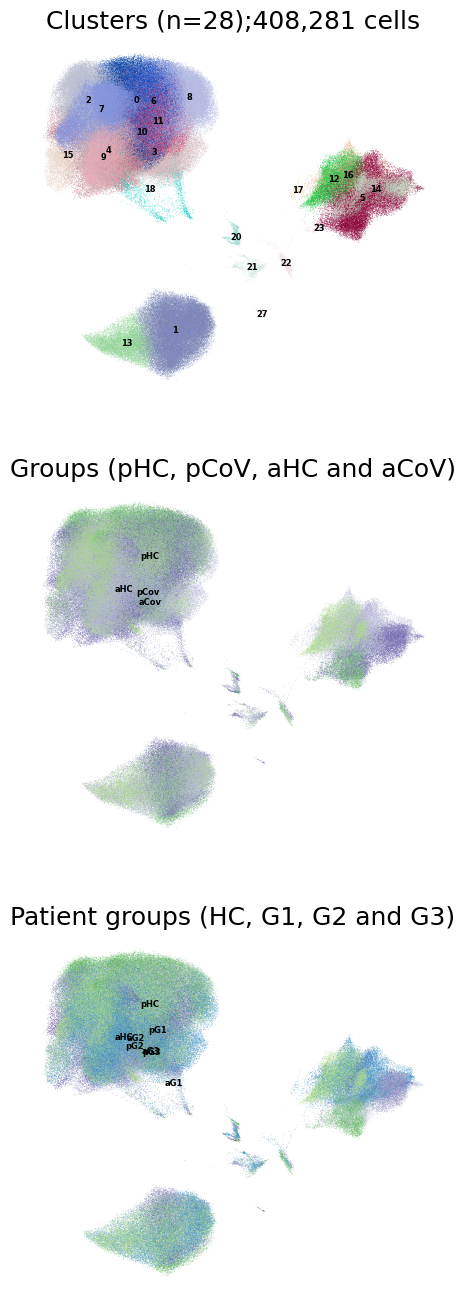

In [5]:
matplotlib.style.use('default')  
rcParams['figure.figsize'] = (5,5)

plt.rc('font', size=15)          # controls default text sizes
plt.rc('legend', fontsize=20)    # legend fontsize


sc.pl.umap(paCov_corrected, 
           color=['Res1_Harm','Groups','Patient_groups'], 
           color_map='OrRd',
           size=0.5, #***
           ncols=1,
           frameon=False,
           legend_loc='on data',
           legend_fontsize=6,  
           title= ['Clusters (n=28);408,281 cells', 'Groups (pHC, pCoV, aHC and aCoV)', 'Patient groups (HC, G1, G2 and G3)'])
           #save='_pCoV_Tsang_Clusters_v2_12072021.pdf')


## Figure.7D

categories: 0, 1, 2, etc.
var_group_labels: Mgk, Mono, DCs, etc.


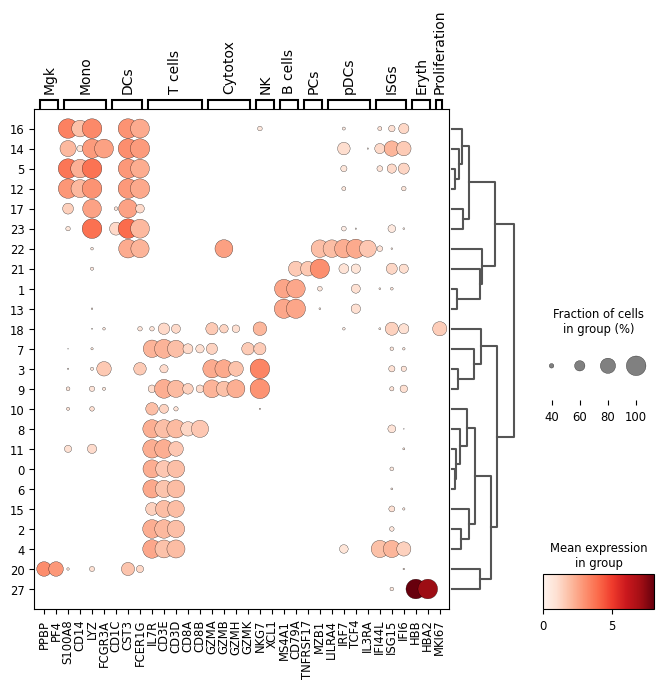

In [6]:
Genes =["PPBP","PF4", #mgk: 0-1
        "S100A8","CD14","LYZ","FCGR3A",#2-5
        'CD1C',"CST3","FCER1G", #6-8
        "IL7R","CD3E","CD3D","CD8A","CD8B", #9-13
        "GZMA","GZMB","GZMH","GZMK",
        "NKG7",'XCL1', #18-19
        "MS4A1", "CD79A", #20-21
        "TNFRSF17", "MZB1",#22-23
        'LILRA4',"IRF7","TCF4","IL3RA", #24-27
        'IFI44L','ISG15','IFI6',#28-30
        'HBB','HBA2','MKI67'] #31-32

matplotlib.style.use('default') 
ax = sc.pl.dotplot(paCov_corrected, 
                   Genes, 
                   'Res1_Harm', 
                   dendrogram=True,  
                   var_group_positions=[(0,1),(2,5), (6,8),(9,13),(14,17),(18,19),(20,21),(22,23),(24,27),(28,30),(31,32), (33,33)],
                   var_group_labels=['Mgk','Mono', 'DCs','T cells','Cytotox','NK','B cells','PCs','pDCs','ISGs','Eryth','Proliferation'], 
                   figsize=(8,6.5),
                    dot_max=1, 
                   dot_min=0.3)

In [7]:
paCov_corrected.obs['Patient_groups'].cat.categories

Index(['aG1', 'aG2', 'aG3', 'aHC', 'pG1', 'pG2', 'pG3', 'pHC'], dtype='object')

## Extended Data Fig. 10A

categories: B_cells_SC0, B_cells_SC1, B_cells_SC2, etc.
var_group_labels: Mgk, Mono, DCs, etc.


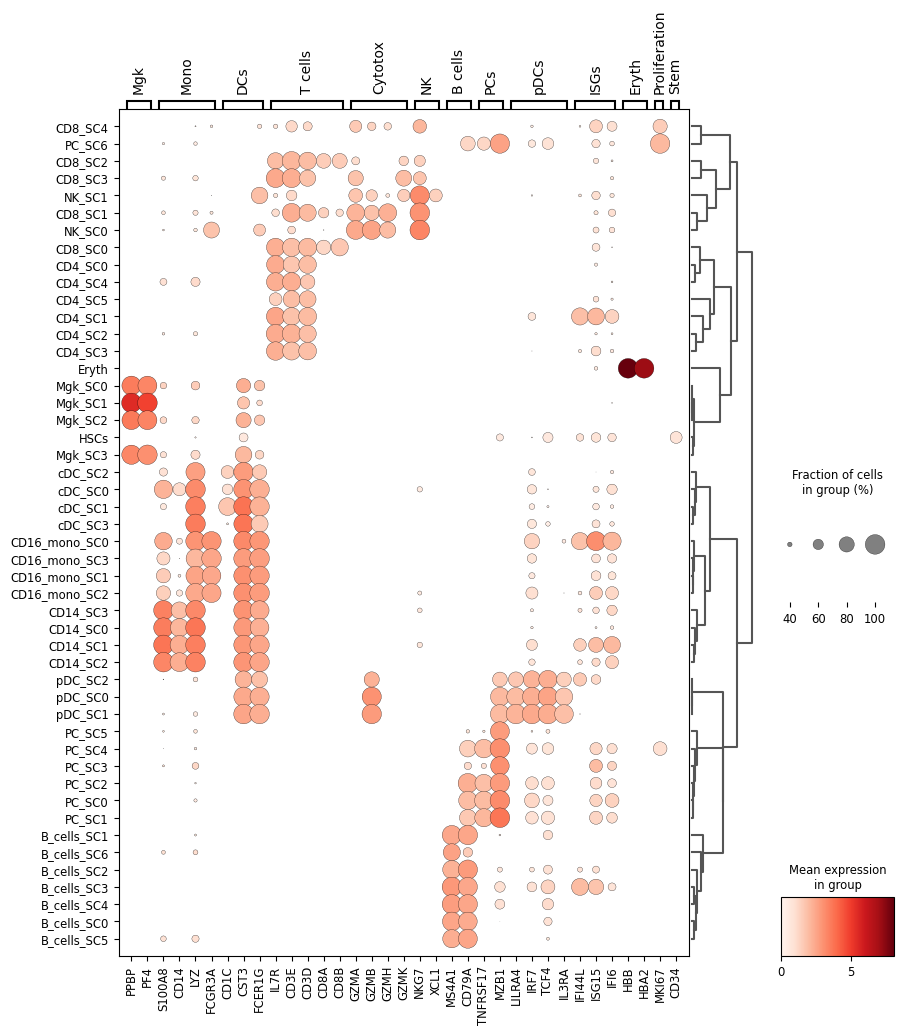

In [8]:
Genes =["PPBP","PF4", #mgk: 0-1
        "S100A8","CD14","LYZ","FCGR3A",#2-5
        'CD1C',"CST3","FCER1G", #6-8
        "IL7R","CD3E","CD3D","CD8A","CD8B", #9-13
        "GZMA","GZMB","GZMH","GZMK",
        "NKG7",'XCL1', #18-19
        "MS4A1", "CD79A", #20-21
        "TNFRSF17", "MZB1",#22-23
        'LILRA4',"IRF7","TCF4","IL3RA", #24-27
        'IFI44L','ISG15','IFI6',#28-30
        'HBB','HBA2','MKI67','CD34'] #31-32

matplotlib.style.use('default') 
ax = sc.pl.dotplot(paCov_corrected, 
                   Genes, 
                   'SCs', 
                   dendrogram=True,  
                   var_group_positions=[(0,1),(2,5), (6,8),(9,13),(14,17),(18,19),(20,21),(22,23),(24,27),(28,30),(31,32), (33,33), (34,34)],
                   var_group_labels=['Mgk','Mono', 'DCs','T cells','Cytotox','NK','B cells','PCs','pDCs','ISGs','Eryth','Proliferation','Stem'], 
                   figsize=(10,11),
                    dot_max=1, 
                   dot_min=0.3, 
                   save='SCs_Genemarkers_paCov_Tsang_cleaned_12072021.pdf') 


## Extended Data Fig. 10B

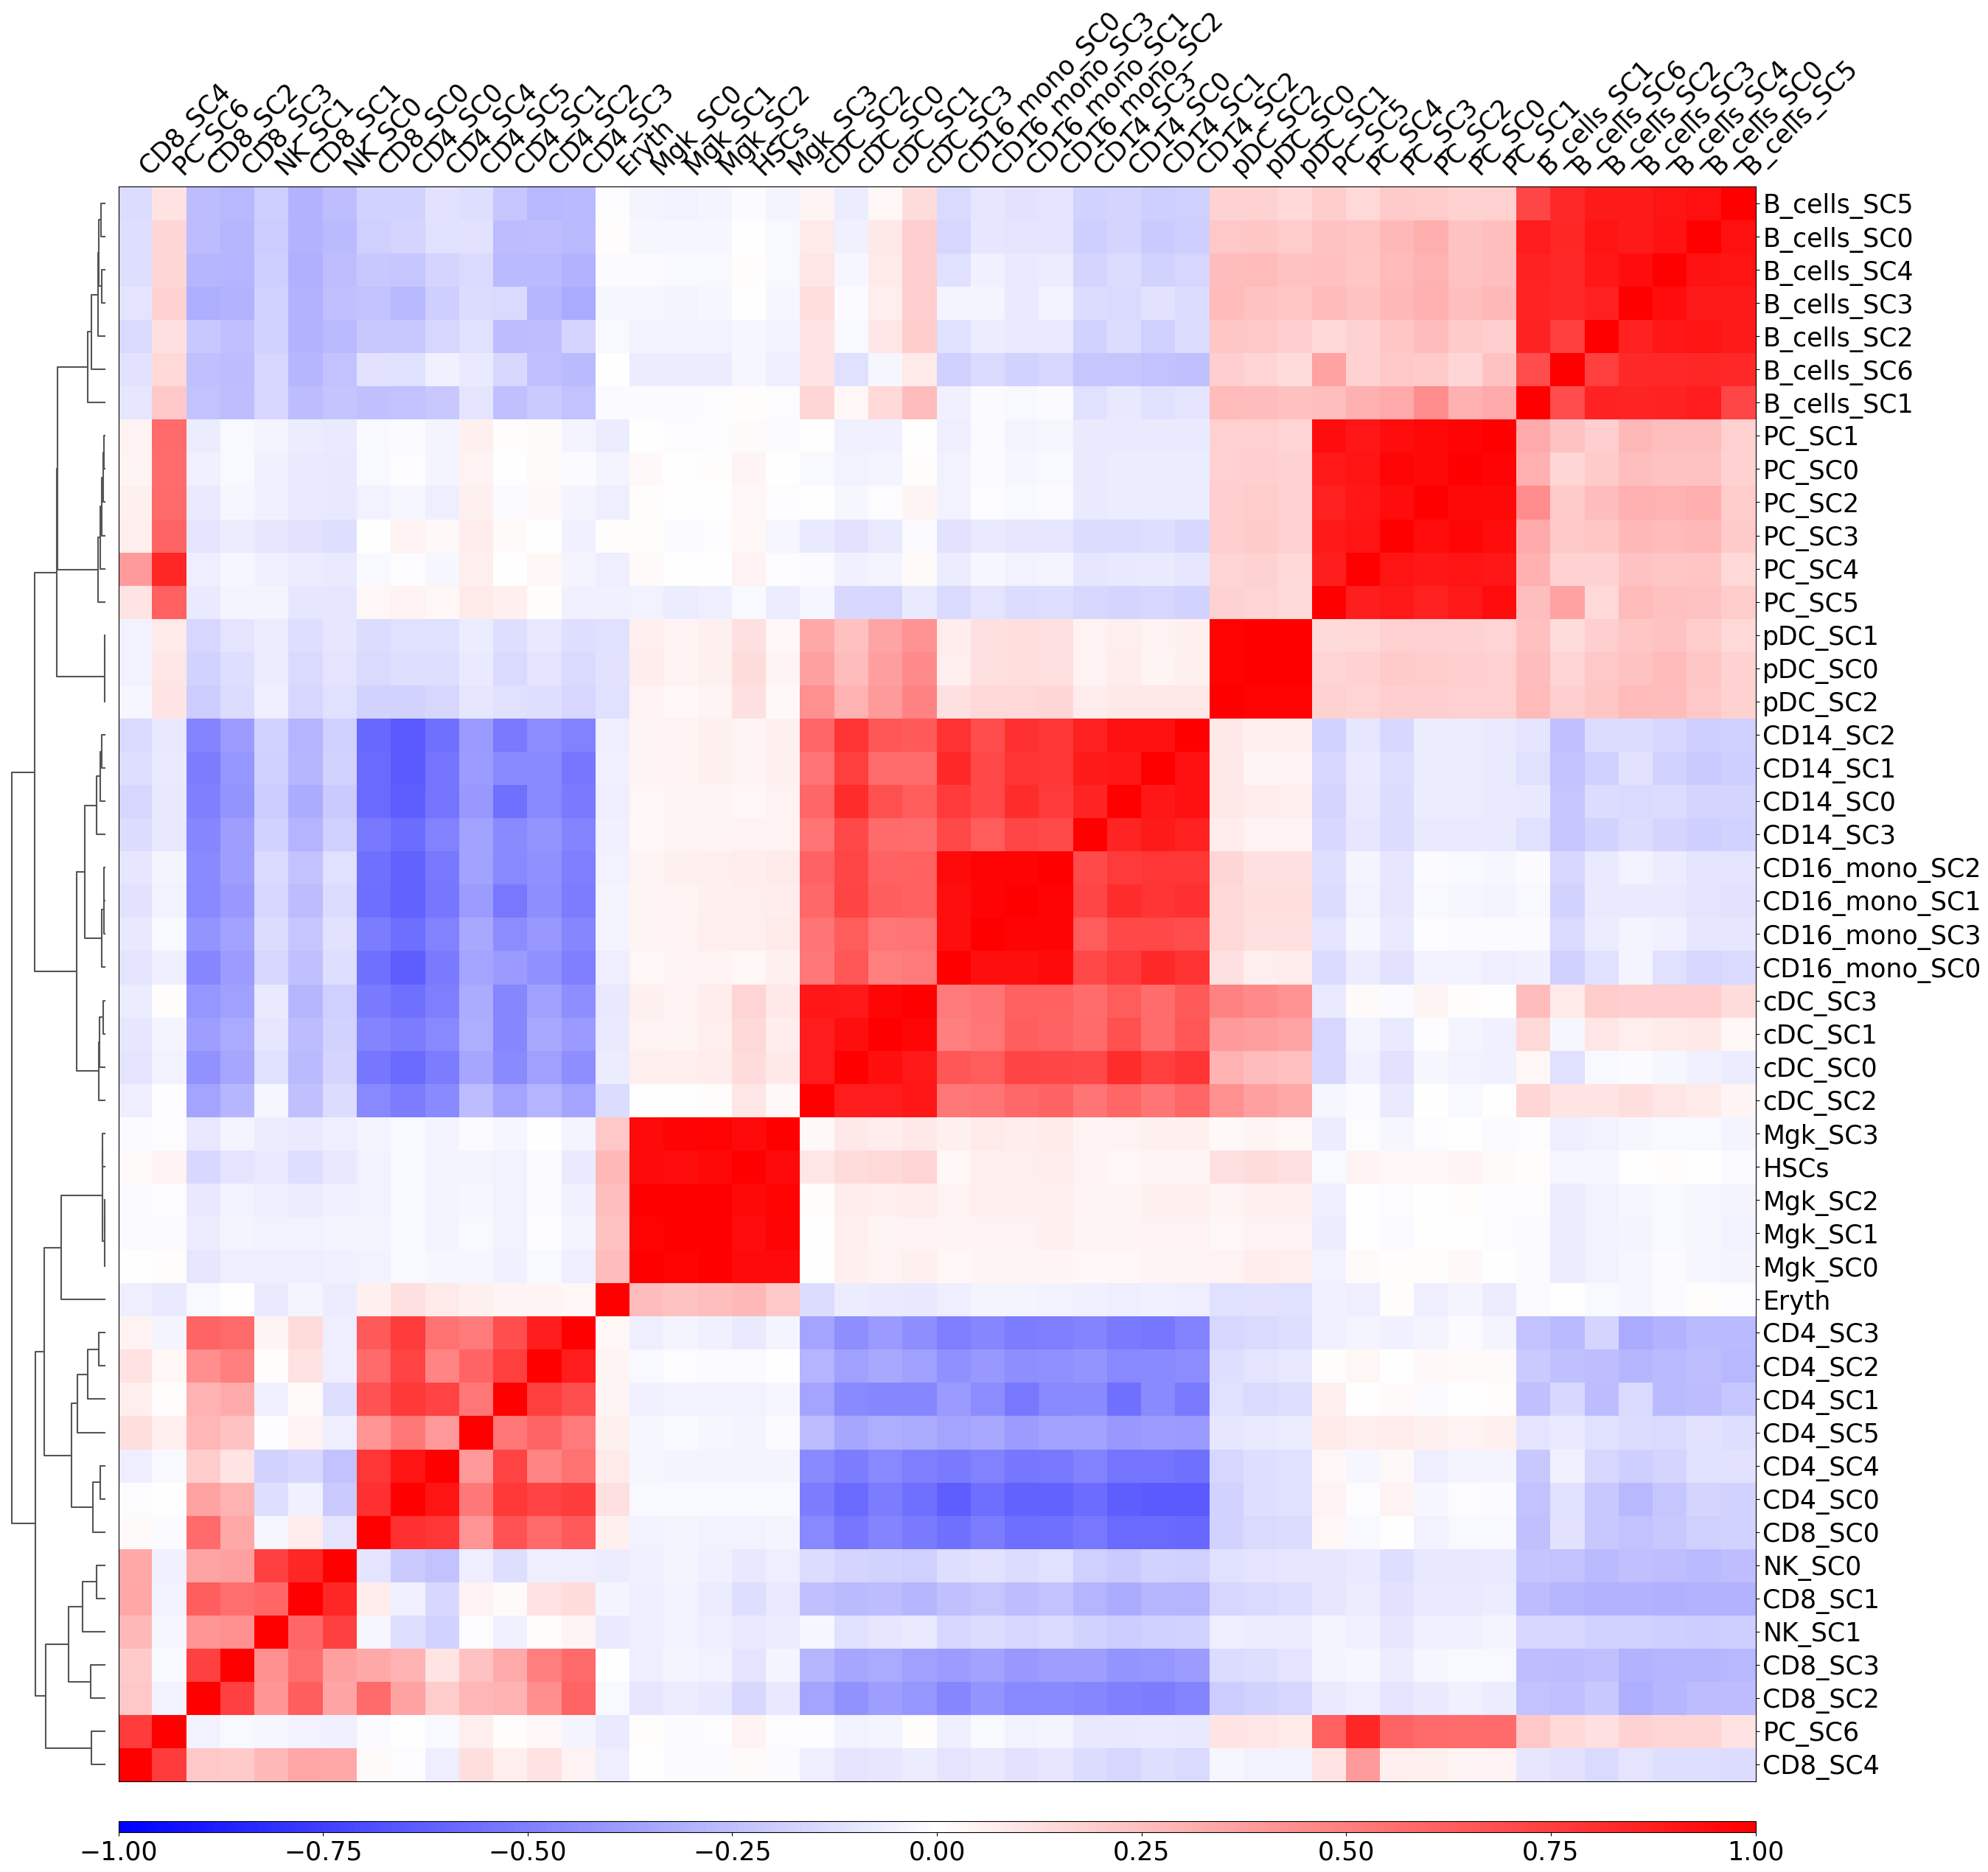

In [9]:
matplotlib.style.use('default')  
rcParams['figure.figsize'] = (4,4)
plt.rc('font', size=25)          # controls default text sizes

ax = sc.pl.correlation_matrix(paCov_corrected, 'SCs', save='_Cor_SCs_12162021.pdf')


## Extended Data Fig. 10C

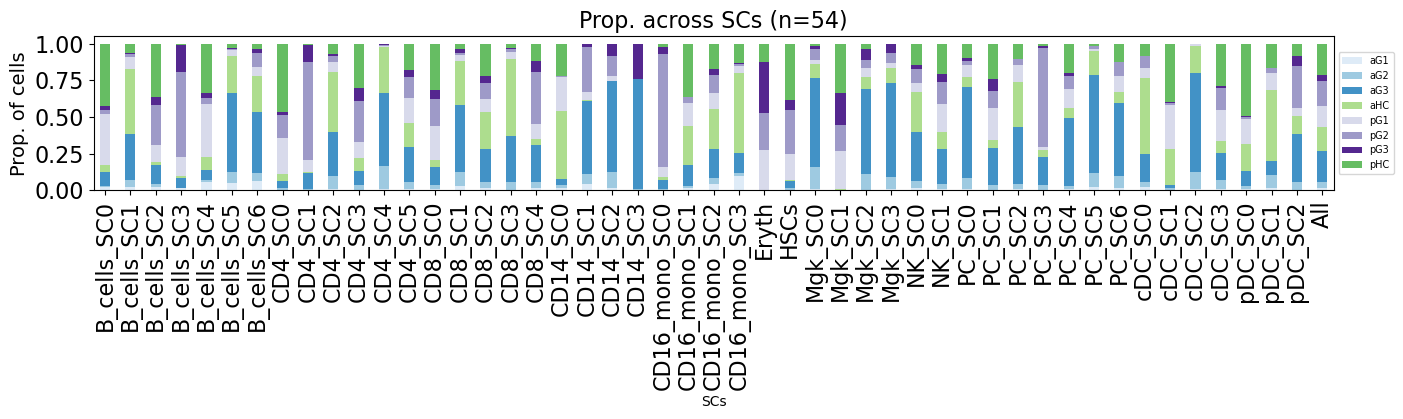

In [10]:
matplotlib.style.use('default')   

#-- proportion table
Groups_tab = pd.crosstab(index=paCov_corrected.obs['SCs'],  # Make a crosstab
                        columns=paCov_corrected.obs['Patient_groups'], margins=True)  

MyTab= Groups_tab.div(Groups_tab["All"], axis=0)
MyTab2 = MyTab.drop(columns="All")

MyTab2.plot(kind="bar",
            figsize=(16,2),
            stacked=True, 
            linewidth=1, 
            width=0.4, 
            fontsize=16, 
            color=col_patient_groups)


plt.title("Prop. across SCs (n=54)", fontsize=16)
plt.ylabel("Prop. of cells", fontsize=14)
#plt.xlabel("S", fontsize=14)
plt.ylim=1.0

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=7)
plt.show()

## Extended Data Fig. 10B

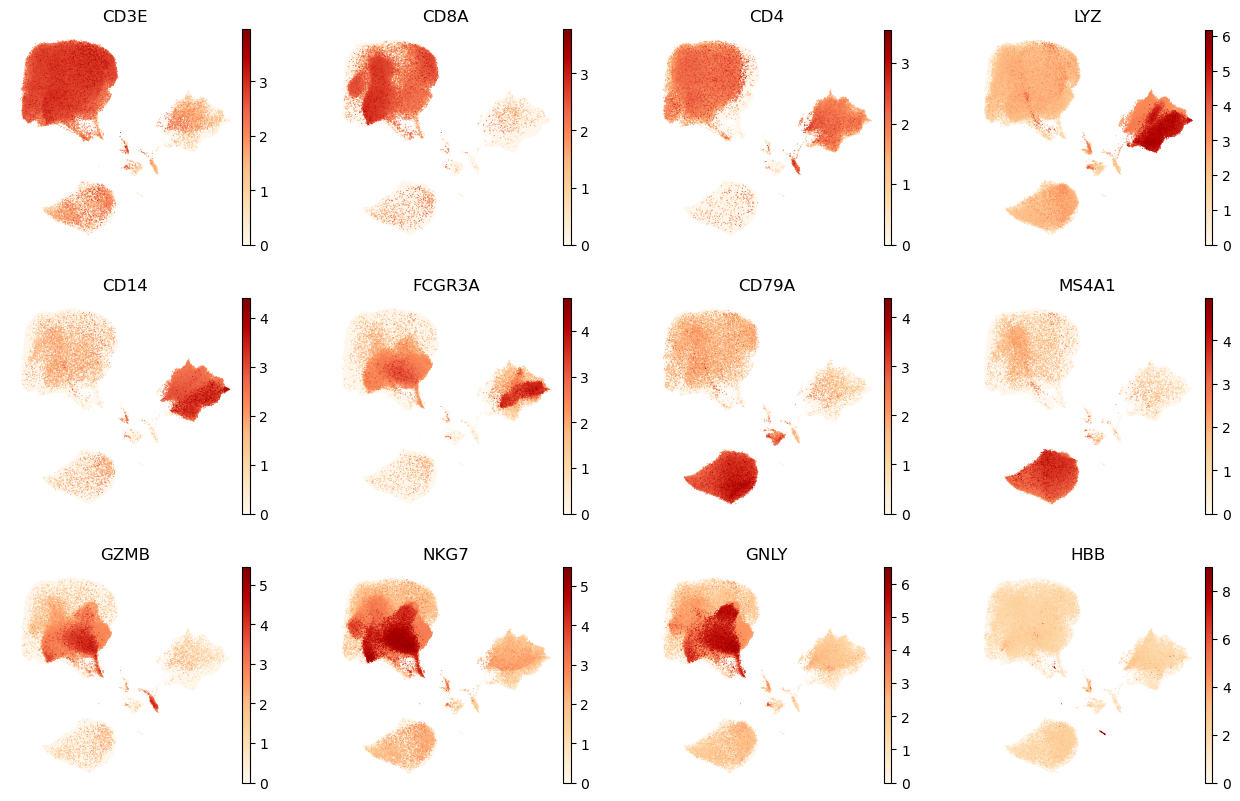

In [11]:
matplotlib.style.use('default')   
rcParams['figure.figsize'] = (3,3)

genes=['CD3E','CD8A','CD4','LYZ',
       'CD14','FCGR3A','CD79A','MS4A1',
       'GZMB','NKG7','GNLY','HBB']

sc.pl.umap(paCov_corrected, 
           color=genes,
           size=2, 
           color_map='OrRd',
           ncols=4,
           frameon=False, save='_paCoV_Tsang_MarkerGenes_12162021.pdf')

## Extended Data Fig. 10D

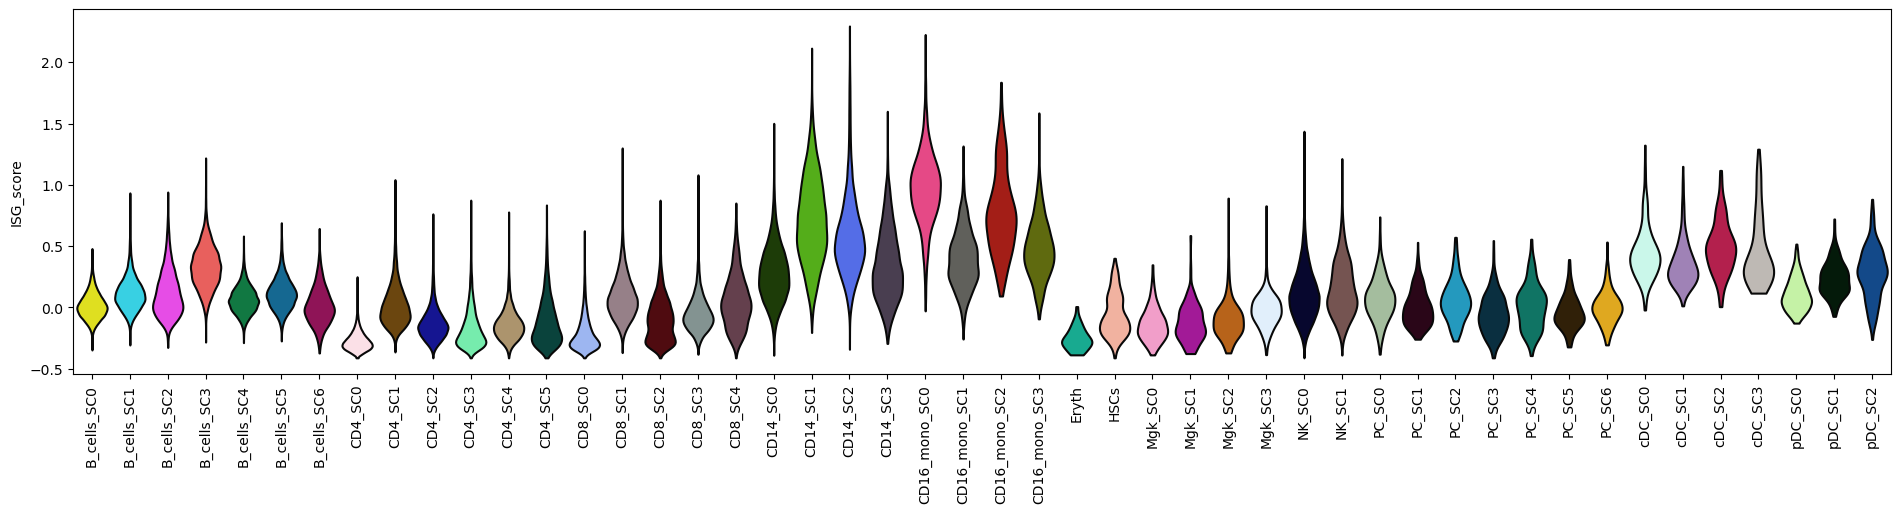

In [14]:
rcParams['figure.figsize'] = (18,5)
sc.pl.violin(paCov_corrected, 'ISG_score', groupby='SCs', rotation=90, size=0,colors=col_ids)

In [15]:
paCov_corrected

AnnData object with n_obs × n_vars = 408281 × 1878
    obs: 'Cells', 'Samples', 'IDs', 'Names', 'Fig_ids', 'Groups', 'Ethnicity', 'Age_Months', 'runs_10X', 'Year', 'Patient_groups', 'SCs', 'n_genes', 'n_counts', 'nCount_RNA', 'nFeature_RNA', 'nCount_CITE', 'nFeature_CITE', 'nCount_HTO', 'nFeature_HTO', 'Batch', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification_global', 'hash_ID', 'INT_ID', 'BARCODE', 'NUM_SNPS', 'NUM_READS', 'DROPLET_TYPE', 'BEST_GUESS', 'BEST_LLK', 'NEXT_GUESS', 'NEXT_LLK', 'DIFF_LLK_BEST_NEXT', 'BEST_POSTERIOR', 'SNG_POSTERIOR', 'SNG_BEST_GUESS', 'SNG_BEST_LLK', 'SNG_NEXT_GUESS', 'SNG_NEXT_LLK', 'SNG_ONLY_POSTERIOR', 'DBL_BEST_GUESS', 'DBL_BEST_LLK', 'DIFF_LLK_SNG_DBL', 'NewBarcode', 'percent_mito', 'autoHashcalls', 'ADTmclust1mean', 'Donor', 'Sample', 'adt_snn_res_0_5', 'seurat_clusters', 'BatchClusters', 'sample', 'BatchSort', 'Age', 'Subject', 'Gender', 'Ward', 'Status', 'Pool', 'Timepoint', 'Class', 'Sorted', 'sample_id', 'sampl